In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('./salary_data_cleaned/salary_data_cleaned.csv')

# Select relevant features for the model
features = ['Job Title', 'Company Name', 'Location', 'Sector', 'Industry', 'Revenue', 'Founded', 
            'python_yn', 'R_yn', 'spark', 'aws', 'excel']
target = 'avg_salary'

# Encode categorical variables
data_encoded = data.copy()
label_encoders = {}
for column in ['Job Title', 'Company Name', 'Location', 'Sector', 'Industry', 'Revenue']:
    label_encoders[column] = LabelEncoder()
    data_encoded[column] = label_encoders[column].fit_transform(data[column])

# Split the dataset into training and testing sets
X = data_encoded[features]
y = data_encoded[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
linear_model = LinearRegression()
decision_tree_model = DecisionTreeRegressor(random_state=42)
random_forest_model = RandomForestRegressor(random_state=42)

# Train the models
linear_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

# Make predictions
linear_predictions = linear_model.predict(X_test)
decision_tree_predictions = decision_tree_model.predict(X_test)
random_forest_predictions = random_forest_model.predict(X_test)

# Evaluate the models
def evaluate_model(predictions, y_test):
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return mae, mse, r2

linear_mae, linear_mse, linear_r2 = evaluate_model(linear_predictions, y_test)
decision_tree_mae, decision_tree_mse, decision_tree_r2 = evaluate_model(decision_tree_predictions, y_test)
random_forest_mae, random_forest_mse, random_forest_r2 = evaluate_model(random_forest_predictions, y_test)

# Print the evaluation results
print("Linear Regression - MAE: {:.2f}, MSE: {:.2f}, R²: {:.2f}".format(linear_mae, linear_mse, linear_r2))
print("Decision Tree - MAE: {:.2f}, MSE: {:.2f}, R²: {:.2f}".format(decision_tree_mae, decision_tree_mse, decision_tree_r2))
print("Random Forest - MAE: {:.2f}, MSE: {:.2f}, R²: {:.2f}".format(random_forest_mae, random_forest_mse, random_forest_r2))


Linear Regression - MAE: 28.26, MSE: 1365.68, R²: 0.16
Decision Tree - MAE: 11.36, MSE: 668.59, R²: 0.59
Random Forest - MAE: 14.03, MSE: 478.80, R²: 0.71


C:\Users\samir\AppData\Local\Temp\ipykernel_15432\2573008752.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MAE', data=evaluation_df, palette='viridis')
C:\Users\samir\AppData\Local\Temp\ipykernel_15432\2573008752.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MSE', data=evaluation_df, palette='viridis')
C:\Users\samir\AppData\Local\Temp\ipykernel_15432\2573008752.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R²', data=evaluation_df, palette='viridis')


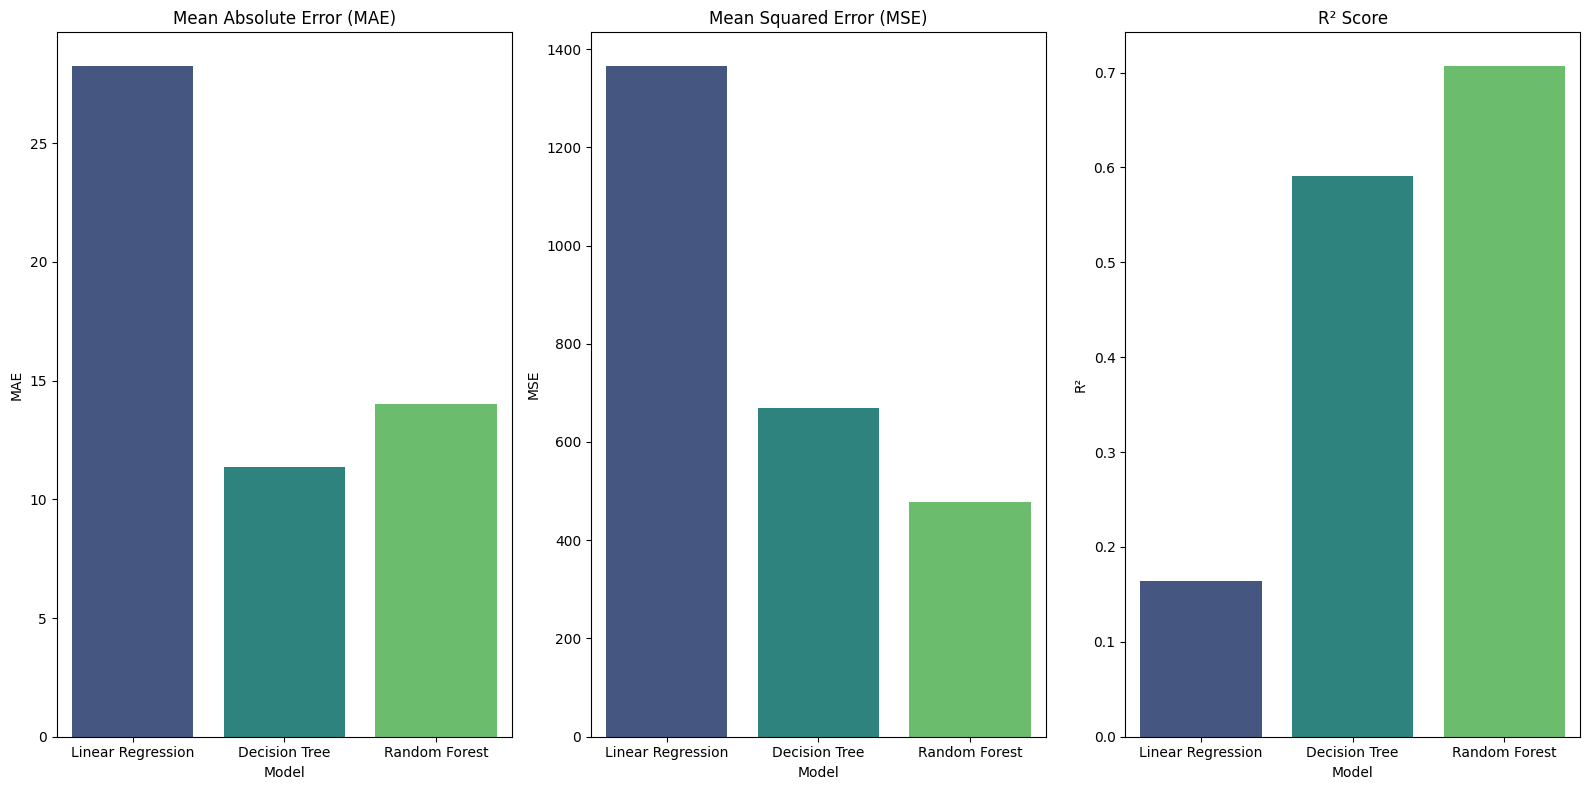

In [2]:
# Store evaluation results
evaluation_results = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'MAE': [linear_mae, decision_tree_mae, random_forest_mae],
    'MSE': [linear_mse, decision_tree_mse, random_forest_mse],
    'R²': [linear_r2, decision_tree_r2, random_forest_r2]
}

evaluation_df = pd.DataFrame(evaluation_results)

# Plot the evaluation results using bar plots
plt.figure(figsize=(16, 8))

# MAE Plot
plt.subplot(1, 3, 1)
sns.barplot(x='Model', y='MAE', data=evaluation_df, palette='viridis')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Model')
plt.ylabel('MAE')

# MSE Plot
plt.subplot(1, 3, 2)
sns.barplot(x='Model', y='MSE', data=evaluation_df, palette='viridis')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Model')
plt.ylabel('MSE')

# R² Plot
plt.subplot(1, 3, 3)
sns.barplot(x='Model', y='R²', data=evaluation_df, palette='viridis')
plt.title('R² Score')
plt.xlabel('Model')
plt.ylabel('R²')

plt.tight_layout()
plt.show()
